In [1]:
#-*-coding:utf-8-*-

%load_ext autoreload
%autoreload 2

import sys
import os

import numpy as np
import pandas as pd

import torch
from torch.utils.data import DataLoader
import torchvision

import cv2

import copy

import time

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import date2num
%matplotlib inline

__ROOT_PATH = os.path.abspath('../../')
sys.path.append(__ROOT_PATH)

matplotlib.rcParams['figure.facecolor'] = 'w'

In [2]:
from csgan.loader.colored_mnist_loader import ColoredMnistDataset
from csgan.model.cs_glow_model_huk import CSGlowMnistModel

In [3]:
DATA_ROOT = os.path.join(__ROOT_PATH, "data/")
RUN_ROOT = os.path.join(__ROOT_PATH, "runs/")

In [8]:
run_dir = os.path.join(RUN_ROOT, "mnist_cs_glow/")
os.makedirs(run_dir, exist_ok=True)

params = {'seed': 2222, 'num_epoch': 200, 'batch_size': 16, 'test_batch_size': 512,
          'learning_rate': 0.0002, 'beta1': 0.5, 'beta2': 0.999,
          'scheduler_gamma': 1., 'weight_decay': 0., #0.00001,
          'lambda_glow': 0.01, 'lambda_weight_cycle': 10., 'lambda_siamese': 10.,
          'lambda_content': 1., 'lambda_compatible': 1.,
          'gamma_content': 1., 'gamma_compatible': 1.,
          'scheduler_interval': 1000, 'checkpoint_interval': 10,
          'validation_interval': 10, 'logging_interval': 10, 'sampling_interval': 100,
          'stopping_loss': 'loss',
          'run_dir': run_dir}

In [9]:
train_dataset = ColoredMnistDataset(root=DATA_ROOT, dirname='colored_mnist_bg', train=True)
test_dataset = ColoredMnistDataset(root=DATA_ROOT, dirname='colored_mnist_bg', train=False)
print(len(train_dataset), len(test_dataset))

60000 10000


In [10]:
train_loader = DataLoader(train_dataset, params['batch_size'], shuffle=True, drop_last=True)
test_loader = DataLoader(test_dataset, params['test_batch_size'], shuffle=False, drop_last=False)
print(len(train_loader), len(test_loader))

3750 20


In [29]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

cs_model = CSGlowMnistModel(device)
#cs_model.load(os.path.join(run_dir, 'best_model.pth.tar'))
cs_model.train_model(train_loader, params=params)


Learning with learning rate:  0.00020000.



[1/200] 10'th step. [LOSS] 4.644901. [LOSS_GLOW] 0.399950. [LOSS_WEIGHT_CYCLE] 0.636156. [LOSS_CONTENT] 0.691558. [ACCURACY_CONTENT] 0.468750. [LOSS_COMPATIBLE] 0.707460. [ACCURACY_COMPATIBLE] 0.500000. [LOSS_SIAMESE] 2.962029. [NORM_S1] 0.544237. [NORM_S2] 0.540904
    Best Step:     10. Elapsed Time: 16.642509 seconds.
[1/200] 20'th step. [LOSS] 2.405857. [LOSS_GLOW] 0.390665. [LOSS_WEIGHT_CYCLE] 0.167152. [LOSS_CONTENT] 0.697056. [ACCURACY_CONTENT] 0.500000. [LOSS_COMPATIBLE] 0.695261. [ACCURACY_COMPATIBLE] 0.500000. [LOSS_SIAMESE] 0.798553. [NORM_S1] 0.282583. [NORM_S2] 0.280993
    Best Step:     20. Elapsed Time: 26.678679 seconds.
[1/200] 30'th step. [LOSS] 2.183692. [LOSS_GLOW] 0.385083. [LOSS_WEIGHT_CYCLE] 0.078284. [LOSS_CONTENT] 0.694748. [ACCURACY_CONTENT] 0.500000. [LOSS_COMPATIBLE] 0.698370. [ACCURACY_COMPATIBLE] 0.500000. [LOSS_SIAMESE] 0.532317. [NORM_S1] 0.230718. [NORM_S2] 0.230516
    Best Step:     30. Elapsed Time: 36.493439 seconds.
[1/200] 40'th step. [LOSS] 2.16

[1/200] 110'th step. [LOSS] 2.129941. [LOSS_GLOW] 0.361135. [LOSS_WEIGHT_CYCLE] 0.012298. [LOSS_CONTENT] 0.692825. [ACCURACY_CONTENT] 0.500000. [LOSS_COMPATIBLE] 0.688263. [ACCURACY_COMPATIBLE] 0.546875. [LOSS_SIAMESE] 0.421900. [NORM_S1] 0.205400. [NORM_S2] 0.206320
    Best Step:    110. Elapsed Time: 121.122224 seconds.
[1/200] 120'th step. [LOSS] 2.154938. [LOSS_GLOW] 0.382546. [LOSS_WEIGHT_CYCLE] 0.000982. [LOSS_CONTENT] 0.697614. [ACCURACY_CONTENT] 0.500000. [LOSS_COMPATIBLE] 0.693421. [ACCURACY_COMPATIBLE] 0.500000. [LOSS_SIAMESE] 0.340222. [NORM_S1] 0.184451. [NORM_S2] 0.184496
    Best Step:    120. Elapsed Time: 131.169364 seconds.
[1/200] 130'th step. [LOSS] 2.019938. [LOSS_GLOW] 0.363022. [LOSS_WEIGHT_CYCLE] 0.001660. [LOSS_CONTENT] 0.693498. [ACCURACY_CONTENT] 0.500000. [LOSS_COMPATIBLE] 0.691435. [ACCURACY_COMPATIBLE] 0.484375. [LOSS_SIAMESE] 0.257156. [NORM_S1] 0.160361. [NORM_S2] 0.160566
    Best Step:    130. Elapsed Time: 142.113150 seconds.
[1/200] 140'th step. [LOS

[1/200] 210'th step. [LOSS] 2.094340. [LOSS_GLOW] 0.332416. [LOSS_WEIGHT_CYCLE] 0.009837. [LOSS_CONTENT] 0.693437. [ACCURACY_CONTENT] 0.500000. [LOSS_COMPATIBLE] 0.691166. [ACCURACY_COMPATIBLE] 0.500000. [LOSS_SIAMESE] 0.407925. [NORM_S1] 0.201969. [NORM_S2] 0.202108
    Best Step:    210. Elapsed Time: 247.215733 seconds.
[1/200] 220'th step. [LOSS] 1.939766. [LOSS_GLOW] 0.340079. [LOSS_WEIGHT_CYCLE] 0.001545. [LOSS_CONTENT] 0.693624. [ACCURACY_CONTENT] 0.500000. [LOSS_COMPATIBLE] 0.690904. [ACCURACY_COMPATIBLE] 0.500000. [LOSS_SIAMESE] 0.173821. [NORM_S1] 0.131841. [NORM_S2] 0.131960
    Best Step:    220. Elapsed Time: 262.675404 seconds.
[1/200] 230'th step. [LOSS] 2.059062. [LOSS_GLOW] 0.333492. [LOSS_WEIGHT_CYCLE] 0.004941. [LOSS_CONTENT] 0.693022. [ACCURACY_CONTENT] 0.500000. [LOSS_COMPATIBLE] 0.694223. [ACCURACY_COMPATIBLE] 0.500000. [LOSS_SIAMESE] 0.338074. [NORM_S1] 0.183868. [NORM_S2] 0.184144
    Best Step:    230. Elapsed Time: 273.683017 seconds.
[1/200] 240'th step. [LOS

[1/200] 310'th step. [LOSS] 2.126437. [LOSS_GLOW] 0.318941. [LOSS_WEIGHT_CYCLE] 0.008193. [LOSS_CONTENT] 0.692715. [ACCURACY_CONTENT] 0.531250. [LOSS_COMPATIBLE] 0.691637. [ACCURACY_COMPATIBLE] 0.515625. [LOSS_SIAMESE] 0.417218. [NORM_S1] 0.204258. [NORM_S2] 0.204828
    Best Step:    310. Elapsed Time: 365.407802 seconds.
[1/200] 320'th step. [LOSS] 2.025345. [LOSS_GLOW] 0.318956. [LOSS_WEIGHT_CYCLE] 0.006114. [LOSS_CONTENT] 0.695467. [ACCURACY_CONTENT] 0.500000. [LOSS_COMPATIBLE] 0.692168. [ACCURACY_COMPATIBLE] 0.562500. [LOSS_SIAMESE] 0.290344. [NORM_S1] 0.170394. [NORM_S2] 0.171236
    Best Step:    320. Elapsed Time: 377.093561 seconds.
[1/200] 330'th step. [LOSS] 1.941052. [LOSS_GLOW] 0.311807. [LOSS_WEIGHT_CYCLE] 0.007266. [LOSS_CONTENT] 0.694094. [ACCURACY_CONTENT] 0.500000. [LOSS_COMPATIBLE] 0.694235. [ACCURACY_COMPATIBLE] 0.375000. [LOSS_SIAMESE] 0.253613. [NORM_S1] 0.159251. [NORM_S2] 0.159113
    Best Step:    330. Elapsed Time: 387.564567 seconds.
[1/200] 340'th step. [LOS

[1/200] 410'th step. [LOSS] 1.932128. [LOSS_GLOW] 0.316278. [LOSS_WEIGHT_CYCLE] 0.001167. [LOSS_CONTENT] 0.694295. [ACCURACY_CONTENT] 0.500000. [LOSS_COMPATIBLE] 0.690898. [ACCURACY_COMPATIBLE] 0.500000. [LOSS_SIAMESE] 0.163413. [NORM_S1] 0.127833. [NORM_S2] 0.127936
    Best Step:    410. Elapsed Time: 478.435635 seconds.


RuntimeError: svd_cuda: the updating process of SBDSDC did not converge (error: 11)

In [ ]:
all_input, all_output = cs_model.predict(test_loader)

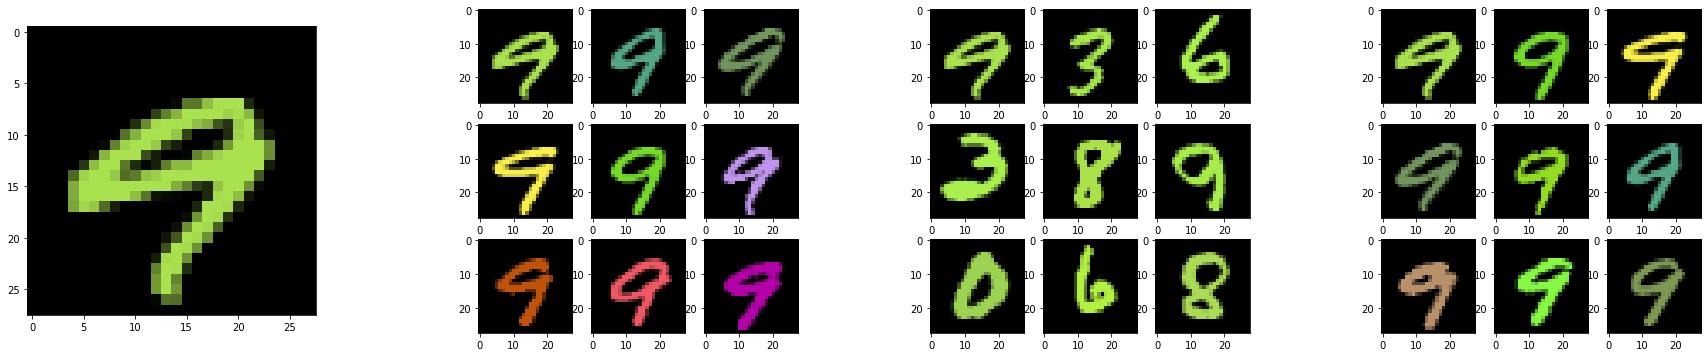

In [11]:
images = all_input['x2'].numpy().transpose(0, 2, 3, 1)
latents = all_output['z2'].numpy()
styles = all_output['s2'].numpy()
contents = all_output['c2'].numpy()

index = np.random.randint(len(images))

fig = plt.figure(figsize=(30, 6))

ax = fig.add_subplot(1, 5, 1)
ax.imshow(images[index])
content_indices = ((contents-contents[index:index+1])**2).mean(axis=1).argsort(axis=0)
style_indices = ((styles-styles[index:index+1])**2).mean(axis=1).argsort(axis=0)
latent_indices = ((latents-latents[index:index+1])**2).mean(axis=1).argsort(axis=0)
for i in range(9):
    ax = fig.add_subplot(3, 15, 15*(i//3)+(i%3)+5)
    ax.imshow(images[content_indices[i]])
for i in range(9):
    ax = fig.add_subplot(3, 15, 15*(i//3)+(i%3)+9)
    ax.imshow(images[style_indices[i]])
for i in range(9):
    ax = fig.add_subplot(3, 15, 15*(i//3)+(i%3)+13)
    ax.imshow(images[latent_indices[i]])

plt.savefig(os.path.join(__ROOT_PATH, "./results/", f"similar_test.png"), dpi=200, bbox_inches='tight')
plt.show()

In [8]:
4/89*100

4.49438202247191